# Simulated Annealing

In [1]:
# Set up imports
%matplotlib ipympl
import random
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

`Annealing()` performs simulated annealing for a general function

Arguments:

- `func`: function to minimise
- `start`: initial position
- `T`: temperature
- `decayrate`: Rate of decay

Returns: 

- `xall`: X coordinates traversed
- `yall`: Y coordinates traversed

In [2]:
def Annealing(func, start, T, decayrate):
    bestcost = 100000
    
    bestx = start
    xall = []
    yall = []
    
    while True:
        # Random step
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        y = func(x)

        if(abs(y-bestcost) < 0.0001):
            break
        
        # Take step if cost decreases
        if y < bestcost:
            bestcost = y
            bestx = x
            xall.append(x)
            yall.append(y)
        # If cost increases, accept move with probability
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                xall.append(x)
                yall.append(y)
                
            pass
        T = T * decayrate

    return xall, yall, xall[-1], yall[-1]
    

Defining $y = f(x)$:

In [3]:
def yfunc(x):
    return x**2 + np.sin(8*x)

Animating simulated annealing on above defined $y= f(x)$:

Minima using simulated annealing algorithm:  x =  -0.1491287592653489
Minimum value: y =  -0.9072514738107165


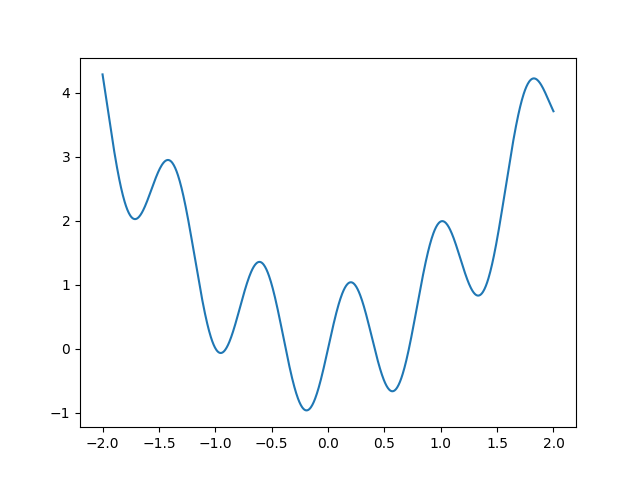

In [4]:
x_new, y_new, min_x, min_y= Annealing(yfunc, -2, 3, .95)
print("Minima using simulated annealing algorithm:  x = ", min_x)
print("Minimum value: y = ", min_y)
xg = np.linspace(-2,2,1000)
yg = yfunc(xg)
fig, ax = plt.subplots()
plt.plot(xg,yg)

lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
x = []
y = []

# Animating simulated annealing
def animate(frame):
    global x_new, y_new
    try:
        xn = x_new[frame]
        yn = y_new[frame]
    except:
        return
    lngood.set_data(xn,yn)
    x.append(xn)
    y.append(yn)
    lnall.set_data(x,y)

anim = FuncAnimation(fig, animate, range(10000), interval = 300, repeat = False)


# Travelling Salesman Problem

**Algorithm:**
We use Simulated Annealing to find the shortest path.

Limitations of gradient descent:
- Can converge at local minima and saddle points
- Slower learning since an update is performed only after we go through all observations

Simulated annealing has a probabilistic way of moving around in a search space and is used for optimizing model parameters. 

We start with a randomized path and compute its cost function (here, distance). From the realized path we randomly swap two cities:
- If the cost function now decreases we retain our swap
- Else, we retain our swap with a probability: $P(\Delta E) = e^{-\frac{\Delta E}{kT}}$

We run this algorithm until a specified number of iterations (`max_iter`), each time updating our path by swapping cities.

After the loop is exited we return the shortest path and plot accordingly.

`readFile()` reads the input file and returns:
- Coordinates of each city as a 2D list
- Total number of cities

In [5]:
def readFile(filename):
    with open(filename, 'r') as filehandle:
        data = filehandle.read().split('\n')
    
    coords= []
    for i in range(1, len(data)): 
        if data[i] == '':
            continue
        
        xy = data[i].split()
        coords.append([float(xy[0]), float(xy[1])])
    coords = np.array(coords)
    return coords, int(data[0])

`Distfunc()` computes and returns the total distance of the path followed.

In [6]:
def Distfunc(x, coordinates): # [0,1,2]
    dist = 0
    for i in range(len(x)-1):
        city1 = x[i]
        city2 = x[i+1]
        
        # Distance between city1 and city2
        dist += np.linalg.norm(coordinates[city1]-coordinates[city2])
    dist += np.linalg.norm(coordinates[x[-1]] - coordinates[x[0]])
    return(dist)

`simulatedAnnealing()` is a function that performs simulated annealing based on the following arguments:
- `func`: Cost function
- `start`: Initial path 
- `T` : Initial temperature
- `max_iter` : Number of iterations to perform
- `coord` : 2D list of coordinates 

returns:
- Shortest path (`bestx`)
- Shortest distance (`bestcost`)
- 2D list of coordinates (`coord`)

In [7]:
def simulatedAnnealing(func, start, T, decayrate, max_iter, coord):
    bestcost = func(start, coord)
    bestx = start
    totalcities = len(start)
    x_swap = start.copy()

    for j in range(max_iter):      
        # Swapping 2 random cities  
        idx = range(1, totalcities)
        i1, i2 = random.sample(idx, 2)
        x_swap[i1], x_swap[i2] = x_swap[i2], x_swap[i1]

        # Computing new cost function
        y = func(x_swap, coord) 

        # If cost function decreases, retain the swap
        if y < bestcost:
            bestcost = y
            bestx = x_swap

        # If cost function increases, retain the swap with a probability
        else:
            # Generate random number from 0 to 1
            toss = np.random.random_sample()

            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x_swap
                
            pass

        T = T * decayrate

        # Update x_swap
        x_swap = bestx.copy()

    return bestx, bestcost, coord

`travellingSalesman()` performs simulated annealing by calling our function `simulatedAnnealing()` and passing `Distfunc()` as the cost function to be minimized.

We randomly generate our initial path.

In [8]:
def travellingSalesman(input_file, T, decayrate, max_iter):
    coords, total_cities = readFile(input_file)

    # Randomly generate iniital path
    random_start = [i for i in range(1, total_cities)]
    random.shuffle(random_start)
    initial = [0] + random_start

    return simulatedAnnealing(Distfunc, initial, T, decayrate, max_iter, coords)

## Travelling Salesman - 10 cities

Calling `travellingSalesman()` for input file with 10 cities and plotting:

Shortest Distance:  34.43384302733041
Path followed: [0, 5, 4, 3, 1, 7, 9, 8, 2, 6]


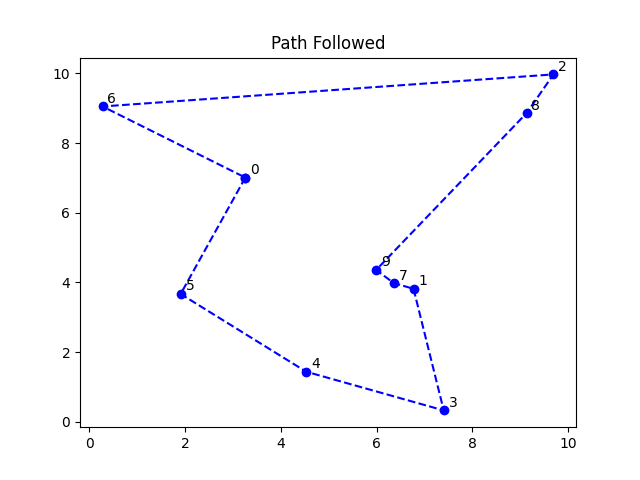

In [11]:
best_path, best_dist, coordinates = travellingSalesman('tsp_10.txt', 1, .95, 1000)    
print("Shortest Distance: ", best_dist)
print("Path followed:", best_path)
plt.clf()
plt.close()
best_x_coord = []
best_y_coord = []
for i in best_path:
    best_x_coord.append(coordinates[i][0])
    best_y_coord.append(coordinates[i][1])
    plt.annotate(str(i), xy=(coordinates[i][0], coordinates[i][1]), xytext=(coordinates[i][0]+0.1, coordinates[i][1]+0.1))
best_x_coord.append(coordinates[best_path[0]][0])
best_y_coord.append(coordinates[best_path[0]][1])
plt.title("Path Followed")
plt.plot(best_x_coord, best_y_coord, linestyle='--', marker='o', color='b')
plt.show()


## Travelling Salesman - 100 cities

Calling `travellingSalesman()` for input file with 100 cities and plotting:

Shortest Distance:  138.77351123965997
Path followed: [0, 61, 95, 34, 27, 21, 80, 7, 99, 65, 15, 39, 54, 55, 31, 97, 3, 22, 36, 71, 73, 96, 64, 91, 28, 41, 4, 5, 23, 33, 32, 79, 70, 1, 11, 37, 81, 44, 43, 9, 66, 78, 26, 8, 74, 24, 92, 57, 38, 63, 94, 13, 49, 68, 47, 51, 75, 58, 67, 17, 16, 88, 76, 6, 18, 89, 2, 77, 90, 29, 59, 53, 14, 93, 52, 30, 86, 25, 19, 50, 42, 84, 12, 72, 87, 45, 56, 48, 98, 69, 83, 20, 35, 10, 85, 62, 46, 82, 40, 60]


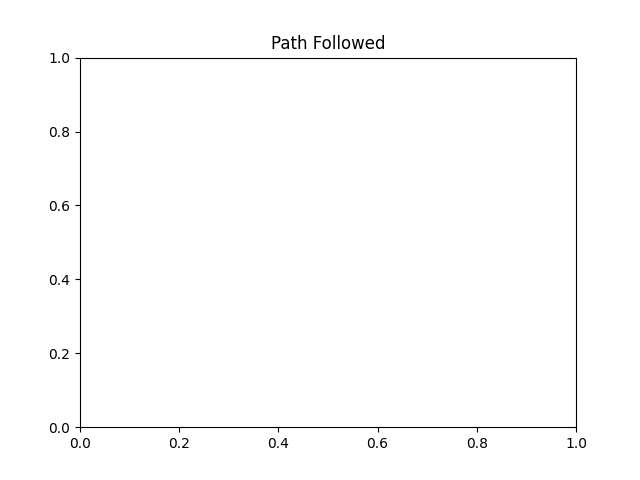

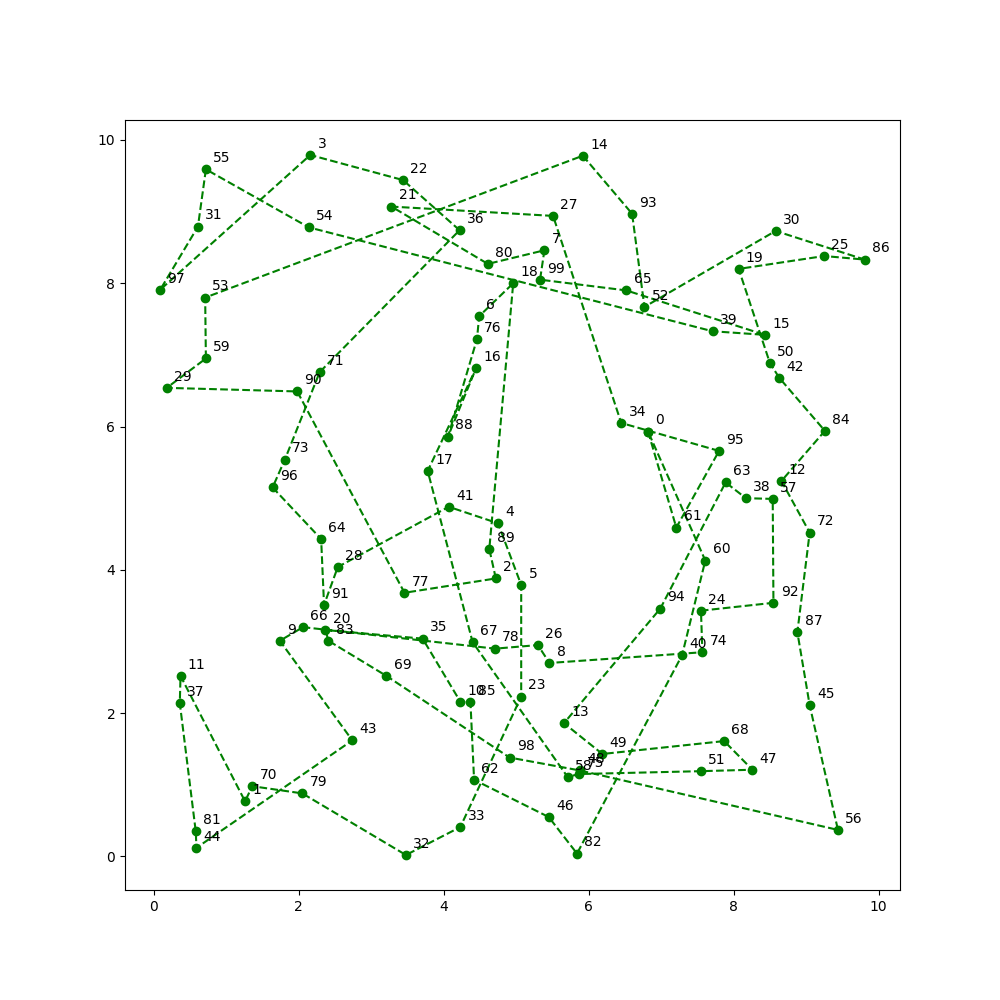

In [12]:
best_path, best_dist, coordinates = travellingSalesman('tsp_100.txt', 5, .95, 10000)    
print("Shortest Distance: ", best_dist)
print("Path followed:", best_path)
plt.clf()
plt.close()
plt.cla()
best_x_coord = []
best_y_coord = []
for i in best_path:
    best_x_coord.append(coordinates[i][0])
    best_y_coord.append(coordinates[i][1])
    
best_x_coord.append(coordinates[best_path[0]][0])
best_y_coord.append(coordinates[best_path[0]][1])

plt.title("Path Followed")
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
for i in best_path:
    plt.annotate(str(i), xy=(coordinates[i][0], coordinates[i][1]), xytext=(coordinates[i][0]+0.1, coordinates[i][1]+0.1))

plt.plot(best_x_coord, best_y_coord, linestyle='--', marker='o', color='g')
